In [1]:
!python -m spacy download el_core_news_sm #για την επεξεργασία ελληνικών κειμένων

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.6 MB 6.1 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
anergia_df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/ανεργια_tweets.tsv", sep='\t') 

In [7]:
print(anergia_df.shape)
print(f"dtype of 'created_at' is: {anergia_df.created_at.dtypes}. To θέλουμε σε datetime64[ns]") 
anergia_df.head(1)

(2757, 31)
dtype of 'created_at' is: object. To θέλουμε σε datetime64[ns]


Unnamed: 0                      created_at                   id  \
0           0  Tue Jun 21 12:43:35 +0000 2022  1539227530904801280   

                id_str  \
0  1539227530904801280   

                                                                                                                                           text  \
0  Fighting Stigma (GR) Σοκ προκάλεσε η πανδημία στην αγορά εργασίας της Κρήτης-Μεγάλη η ευαλωτότητα της ...: Η μεγαλύ… https://t.co/2BKNY0UFsd   

   truncated  \
0       True   

                                                                                                                                                                                                                                          entities  \
0  {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/2BKNY0UFsd', 'expanded_url': 'https://twitter.com/i/web/status/1539227530904801280', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}   

                                               metadata  \
0  {'iso_language_code': 'el', 'result_type': 'recent'}   

                                                     source  \
0  <a href="https://dlvrit.com/" rel="nofollow">dlvr.it</a>   

   in_reply_to_status_id  ...  favorite_count  favorited  retweeted  \
0                    NaN  ...               0      False      False   

  possibly_sensitive lang  retweeted_status  quoted_status_id  \
0              False   el               NaN               NaN   

  quoted_status_id_str  quoted_status  extended_entities  
0                  NaN            NaN                NaN  

[1 rows x 31 columns]

**Βήμα 1 = Επιτυχία. Καταφέραμε και καλέσαμε το αρχείο tsv από το drive μας και είδαμε το πρώτο tweet για το συγκεκριμένο θέμα.**

In [8]:
anergia_df.shape

(2757, 31)

Ας φτιάξουμε λίγο καλύτερα το dataframe μας και να δώσουμε πιο συγκεκριμένες ονομασίες στις στήλες μας. 

In [9]:
anergia_tweets = anergia_df[['created_at','text','retweet_count', 'favorite_count', 'user', 'id']] #απομονώνω τις στήλες που θέλω να κρατήσω

In [10]:
anergia_tweets.head()

created_at  \
0  Tue Jun 21 12:43:35 +0000 2022   
1  Tue Jun 21 12:43:34 +0000 2022   
2  Tue Jun 21 12:43:32 +0000 2022   
3  Tue Jun 21 12:37:56 +0000 2022   
4  Tue Jun 21 12:24:29 +0000 2022   

                                                                                                                                            text  \
0   Fighting Stigma (GR) Σοκ προκάλεσε η πανδημία στην αγορά εργασίας της Κρήτης-Μεγάλη η ευαλωτότητα της ...: Η μεγαλύ… https://t.co/2BKNY0UFsd   
1   Fighting Stigma (GR) Μείωση των εγγεγραμμένων ανέργων τον Μάιο – Πόσοι… δεν αναζητούν εργασία - newmoney: Το σύνολο… https://t.co/K94zrgqmWx   
2   Fighting Stigma (GR) Νέο σοκ με θάνατο βρέφους στην Πάτρα: Νεκρό δίπλα στη μητέρα του: Στο 12,5% η ανεργία τον Απρί… https://t.co/TDUwztd5As   
3  RT @67Morgana: Τον Φεβρουάριο του 2012 η τότε κυβέρνηση Παπαδήμου υπογράφει τη μείωση του κατώτατου μισθού κατά 22%.\nΚ για τους εργαζόμενου…   
4  RT @67Morgana: Τον Φεβρουάριο του 2012 η τότε κυβέρνηση Παπαδήμου υπογράφει τη μείωση του κατώτατου μισθού κατά 22%.\nΚ για τους εργαζόμενου…   

   retweet_count  favorite_count  \
0              0               0   
1              0               0   
2              0               0   
3             18               0   
4             18               0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            user  \
0  {'id': 208056970, 'id_str': '208056970', 'name': 'Stigmabase | UN', 'screen_name': 'StigmabaseU', 'location': 'WORLDWIDE', 'description': 'Asia — भारत  — Türkçe — Čeština — ελληνικά | Keeping up-to-date on global exclusion — Stigmabase is a canadian internet non-profit Initiative', 'url': 'https://t.co/DTaqNj9Hmn', 'entities': {'url': {'urls': [{'url': 'https://t.co/DTaqNj9Hmn', 'expanded_url': 'https://www.stigmabase.org/', 'display_url': 'stigmabase.org', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 2535, 'friends_count': 2403, 'listed_count': 117, 'created_at': 'Tue Oct 26 15:04:54 +0000 2010', 'favourites_count': 0, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 1609316, 'lang': None, 'contributors_enable

In [11]:
anergia_tweets.shape

(2757, 6)

# **Ζητούμενο 2. Πρέπει να μετατρέψουμε τα κείμενα σε πεζούς χαρακτήρες (απαλοιφή κεφαλαίων). Είναι το πρώτο καθάρισμα των δεδομένων που έχουμε συλλέξει.**

In [12]:
anergia_tweets['text'] = anergia_tweets['text'].str.lower()
anergia_tweets['text'][5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


'εαν ο ελον μασκαρας, πράξει αυτο με τους ξεύτικους tweet λογαριασμους, θα αυξηθει η ανεργία και στην ελλαδα'

**Ας αλλάξουμε το string της ημερομηνίας σε datetime, καθώς θα μας χρειαστεί στη συνέχεια να είναι πιο απλοποιημένο**

In [13]:
anergia_tweets.dtypes

created_at        object
text              object
retweet_count      int64
favorite_count     int64
user              object
id                 int64
dtype: object

In [14]:
from datetime import datetime

In [45]:
anergia_tweets['created_at'] = pd.to_datetime(anergia_tweets['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
anergia_tweets['datetime'] = pd.to_datetime(anergia_tweets['created_at'], format='%a %b %m %H:%M:%S +0000 %Y')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
anergia_tweets['year'] = pd.DatetimeIndex(anergia_tweets['datetime']).year
anergia_tweets['month'] = pd.DatetimeIndex(anergia_tweets['datetime']).month
anergia_tweets['day'] = pd.DatetimeIndex(anergia_tweets['datetime']).day

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [48]:
print(anergia_tweets.info())
anergia_tweets.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2757 entries, 0 to 2756
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   created_at      2757 non-null   datetime64[ns]
 1   text            2757 non-null   object        
 2   retweet_count   2757 non-null   int64         
 3   favorite_count  2757 non-null   int64         
 4   user            2757 non-null   object        
 5   id              2757 non-null   int64         
 6   datetime        2757 non-null   datetime64[ns]
 7   year            2757 non-null   int64         
 8   month           2757 non-null   int64         
 9   day             2757 non-null   int64         
dtypes: datetime64[ns](2), int64(6), object(2)
memory usage: 215.5+ KB
None


created_at  \
0 2022-06-21 12:43:35   
1 2022-06-21 12:43:34   
2 2022-06-21 12:43:32   
3 2022-06-21 12:37:56   
4 2022-06-21 12:24:29   

                                                                                                                text  \
0           fighting stigma gr σοκ προκαλεσε η πανδημια στην αγορα εργασιας της κρητης μεγαλη η ευαλωτοτητα της  η     
1                  fighting stigma gr μειωση των εγγεγραμμενων ανεργων τον μαιο  δεν αναζητουν εργασια newmoney το     
2       fighting stigma gr νεο σοκ με θανατο βρεφους στην πατρα νεκρο διπλα στη μητερα του στο 12 5% η ανεργια τον     
3   τον φεβρουαριο του 2012 η τοτε κυβερνηση παπαδημου υπογραφει τη μειωση του κατωτατου μισθου κατα 22% κ για τους    
4   τον φεβρουαριο του 2012 η τοτε κυβερνηση παπαδημου υπογραφει τη μειωση του κατωτατου μισθου κατα 22% κ για τους    

   retweet_count  favorite_count  \
0              0               0   
1              0               0   
2              0               0   
3             18               0   
4             18               0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            user  \
0  {'id': 208056970, 'id_str': '208056970', 'name': 'Stigmabase | UN', 'screen_name': 'StigmabaseU', 'location': 'WORLDWIDE', 'description': 'Asia — भारत  — Türkçe — Čeština — ελληνικά | Keeping up-to-date on global exclusion — Stigmabase is a canadian internet non-profit Initiative', 'url': 'https://t.co/DTaqNj9Hmn', 'entities': {'url': {'urls': [{'url': 'https://t.co/DTaqNj9Hmn', 'expanded_url': 'https://www.stigmabase.org/', 'display_url': 'stigmabase.org', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 2535, 'friends_count': 2403, 'listed_count': 117, 'created_at': 'Tue Oct 26 15:04:54 +0000 2010', 'favourites_count': 0, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 1609316, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': 'FFFFFF', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 

# Ζητούμενο 3. Συνεχίζοντας το καθάρισμα, καθαρίζουμε το df από λέξεις που δεν προσδίδουν νόημα στο κείμενο (π.χ.  links, RT, @ κ.λπ.)

In [49]:
anergia_tweets['text'].str.replace(r'RT\s', '').str.replace(r'@[\w\_]*\s', '').str.replace(r"#[\w\W\d]*","").str.replace(r'http[s\s/\\.]*', '').str.replace("rt", "")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0                    fighting stigma gr σοκ προκαλεσε η πανδημια στην αγορα εργασιας της κρητης μεγαλη η ευαλωτοτητα της  η  
1                           fighting stigma gr μειωση των εγγεγραμμενων ανεργων τον μαιο  δεν αναζητουν εργασια newmoney το  
2                fighting stigma gr νεο σοκ με θανατο βρεφους στην πατρα νεκρο διπλα στη μητερα του στο 12 5% η ανεργια τον  
3            τον φεβρουαριο του 2012 η τοτε κυβερνηση παπαδημου υπογραφει τη μειωση του κατωτατου μισθου κατα 22% κ για τους 
4            τον φεβρουαριο του 2012 η τοτε κυβερνηση παπαδημου υπογραφει τη μειωση του κατωτατου μισθου κατα 22% κ για τους 
                                                                ...                                                          
2752      οδηγει σε πεντε μηνες το πολυ και τον τελευταιο εργαζομενο της λαρκο απο την αμεση αεργια στην μακροχρονια ανεργια 
2753             οδηγει σε πεντε μηνες το πολυ και τον τελευταιο εργαζομενο της λαρκο απο την αμεση αεργια στην μακροχ

**Με τον παραπάνω κώδικα, διώξαμε από το κείμενο, τα RT, ta # ta @ Καθώς και τα λινκς. Ας κάνουμε λίγο ακόμα καθαρισμό του dataframe μας**

In [50]:
anergia_tweets['text'].tail(5)

2752      οδηγει σε πεντε μηνες το πολυ και τον τελευταιο εργαζομενο της λαρκο απο την αμεση αεργια στην μακροχρονια ανεργια 
2753             οδηγει σε πεντε μηνες το πολυ και τον τελευταιο εργαζομενο της λαρκο απο την αμεση αεργια στην μακροχρονια  
2754     οι τοπικες κοινωνιες μπλοκαρουν ενεργειακες τουριστικες επενδυσεις και την ιδια ωρα φωναζουν για ανεργια υποβαθμιση 
2755     οι τοπικες κοινωνιες μπλοκαρουν ενεργειακες τουριστικες επενδυσεις και την ιδια ωρα φωναζουν για ανεργια υποβαθμιση 
2756           θα ηθελα να ρωτησω θα υπαρχει εστω ενας βουλευτης που θα ψηφιση θετικα την τριτη τροπολογια που στελνει στην  
Name: text, dtype: object

In [51]:
anergia_tweets['text'] = anergia_tweets['text'].str.replace(r'[\n]*\s*https?:\/\/.*[\r\n]*'," ").str.replace(r'\n*',"").str.replace(r'[▪️🟢⚪👉]*',"").str.replace(r"\w\/\w", "")
anergia_tweets['text'] = anergia_tweets['text'].str.replace('amp;', '').str.replace(r'[\!\-\:\,\.«»\"“”\[–()&]'," ").str.replace('&gt;', ' ').str.replace(r"\s\s\s?", ' ')
anergia_tweets['text'] = anergia_tweets['text'].str.replace(r"\w*…", "")
anergia_tweets['text'] = anergia_tweets['text'].str.replace(r'\s*@\w+', '', regex=True)
anergia_tweets['text'] = anergia_tweets['text'].str.replace("rt", "")
anergia_tweets['text'] = anergia_tweets['text'].str.replace("φβ", "")
anergia_tweets['text'] = anergia_tweets['text'].str.replace("ερντογαν", "")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [52]:
anergia_tweets['text'].tail(5)

2752      οδηγει σε πεντε μηνες το πολυ και τον τελευταιο εργαζομενο της λαρκο απο την αμεση αεργια στην μακροχρονια ανεργια 
2753              οδηγει σε πεντε μηνες το πολυ και τον τελευταιο εργαζομενο της λαρκο απο την αμεση αεργια στην μακροχρονια 
2754     οι τοπικες κοινωνιες μπλοκαρουν ενεργειακες τουριστικες επενδυσεις και την ιδια ωρα φωναζουν για ανεργια υποβαθμιση 
2755     οι τοπικες κοινωνιες μπλοκαρουν ενεργειακες τουριστικες επενδυσεις και την ιδια ωρα φωναζουν για ανεργια υποβαθμιση 
2756            θα ηθελα να ρωτησω θα υπαρχει εστω ενας βουλευτης που θα ψηφιση θετικα την τριτη τροπολογια που στελνει στην 
Name: text, dtype: object

**Βλέπουμε ότι έγινε ένας αρκετά καλός καθαρισμός του text μας**

# Ζητούμενο 4. Ώρα να φτιάξουμε ένα σύννεφο λέξεων χρησιμοποιώντας την αντίστοιχη βιβλιοθήκη

In [53]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import spacy 
nlp = spacy.load('el_core_news_sm') #εισάγουμε τις κατάλληλες βιβλιοθήκες


In [54]:
anergia_tweets['text'] = anergia_tweets['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
anergia_tweets[anergia_tweets['year']==2020]['text']

Series([], Name: text, dtype: object)

In [56]:
list(nlp.Defaults.stop_words)[0:20]

['μία',
 'πλέον',
 'καθένας',
 'οι',
 'κάτω',
 'όσης',
 'συχνό',
 'ετούτην',
 'μου',
 'όσος',
 'ίδιοσ',
 'επομένως',
 'δικοί',
 'είχε',
 'τελευταίος',
 'τούτα',
 'μιαν',
 'μερικά',
 'οποιδήποτε',
 'γύρω']

In [58]:
text = anergia_tweets[anergia_tweets['year']==2022]['text'].str.cat(sep = ' ').replace("amp", ' ')

In [59]:
anergia_tweets['text'] = anergia_tweets['text'].str.replace('ά','α').str.replace("έ", "ε").str.replace('ή','η').str.replace('ί','ι').str.replace('ό','ο').str.replace('ύ','υ').str.replace('ώ','ω') #ας βγάλουμε και τους τόνους

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
doc = nlp(anergia_tweets['text'][1])

In [61]:
for token in doc:
    print(token, token.lemma_)

fighting fighting
stigma stigma
gr gαr
μειωση μειωση
των ο
εγγεγραμμενων εγγεγραμμενος
ανεργων ανεργων
τον ο
μαιο μαιος
δεν δεν
αναζητουν αναζητω
εργασια εργασιος
newmoney newmoney
το ο


In [62]:
' '.join(token.lemma_ for token in doc)

'fighting stigma gαr μειωση ο εγγεγραμμενος ανεργων ο μαιος δεν αναζητω εργασιος newmoney ο'

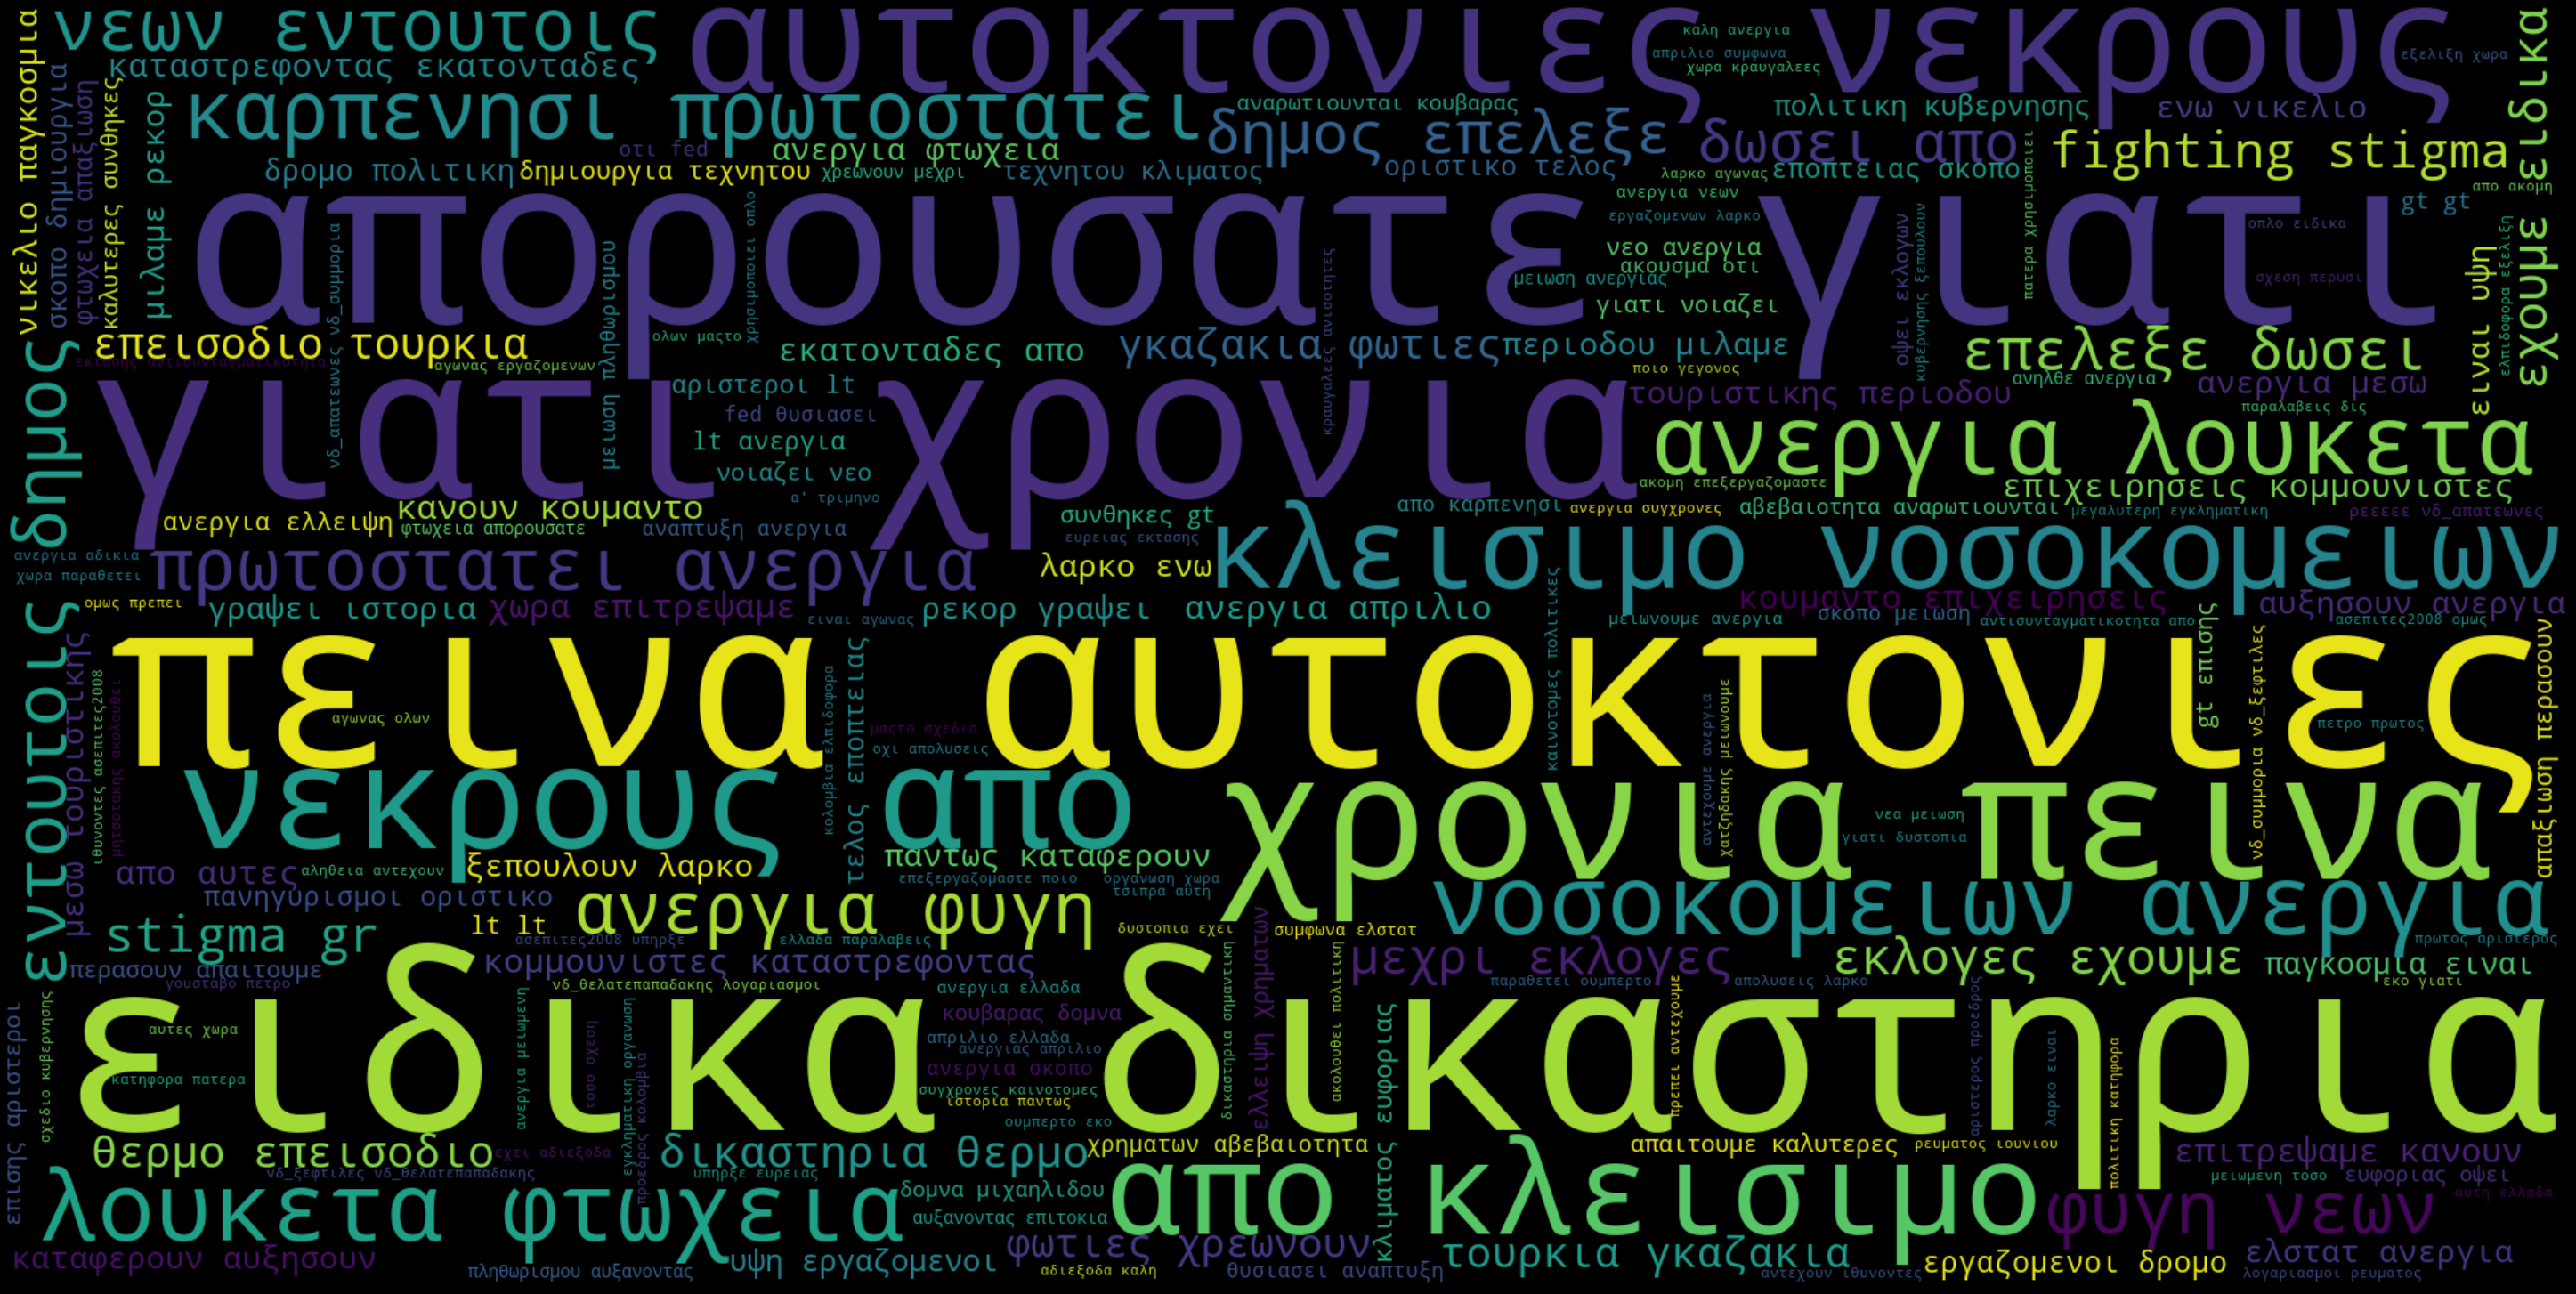

In [64]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words, 
    width = 2000,
    height = 1000,
    background_color = 'black'
    ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Πρέπει να μεταρέψουμε τις διάφορες πτώσεις στην Ονομαστική και τα πρόσωπα στο α Ενικό**

In [65]:
doc = nlp(anergia_tweets['text'][1])

In [66]:
for token in doc:
    print(token, token.lemma_)

fighting fighting
stigma stigma
gr gαr
μειωση μειωση
των ο
εγγεγραμμενων εγγεγραμμενος
ανεργων ανεργων
τον ο
μαιο μαιος
δεν δεν
αναζητουν αναζητω
εργασια εργασιος
newmoney newmoney
το ο


In [67]:
' '.join(token.lemma_ for token in doc)

'fighting stigma gαr μειωση ο εγγεγραμμενος ανεργων ο μαιος δεν αναζητω εργασιος newmoney ο'

In [68]:
full_doc = nlp(text)

In [69]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

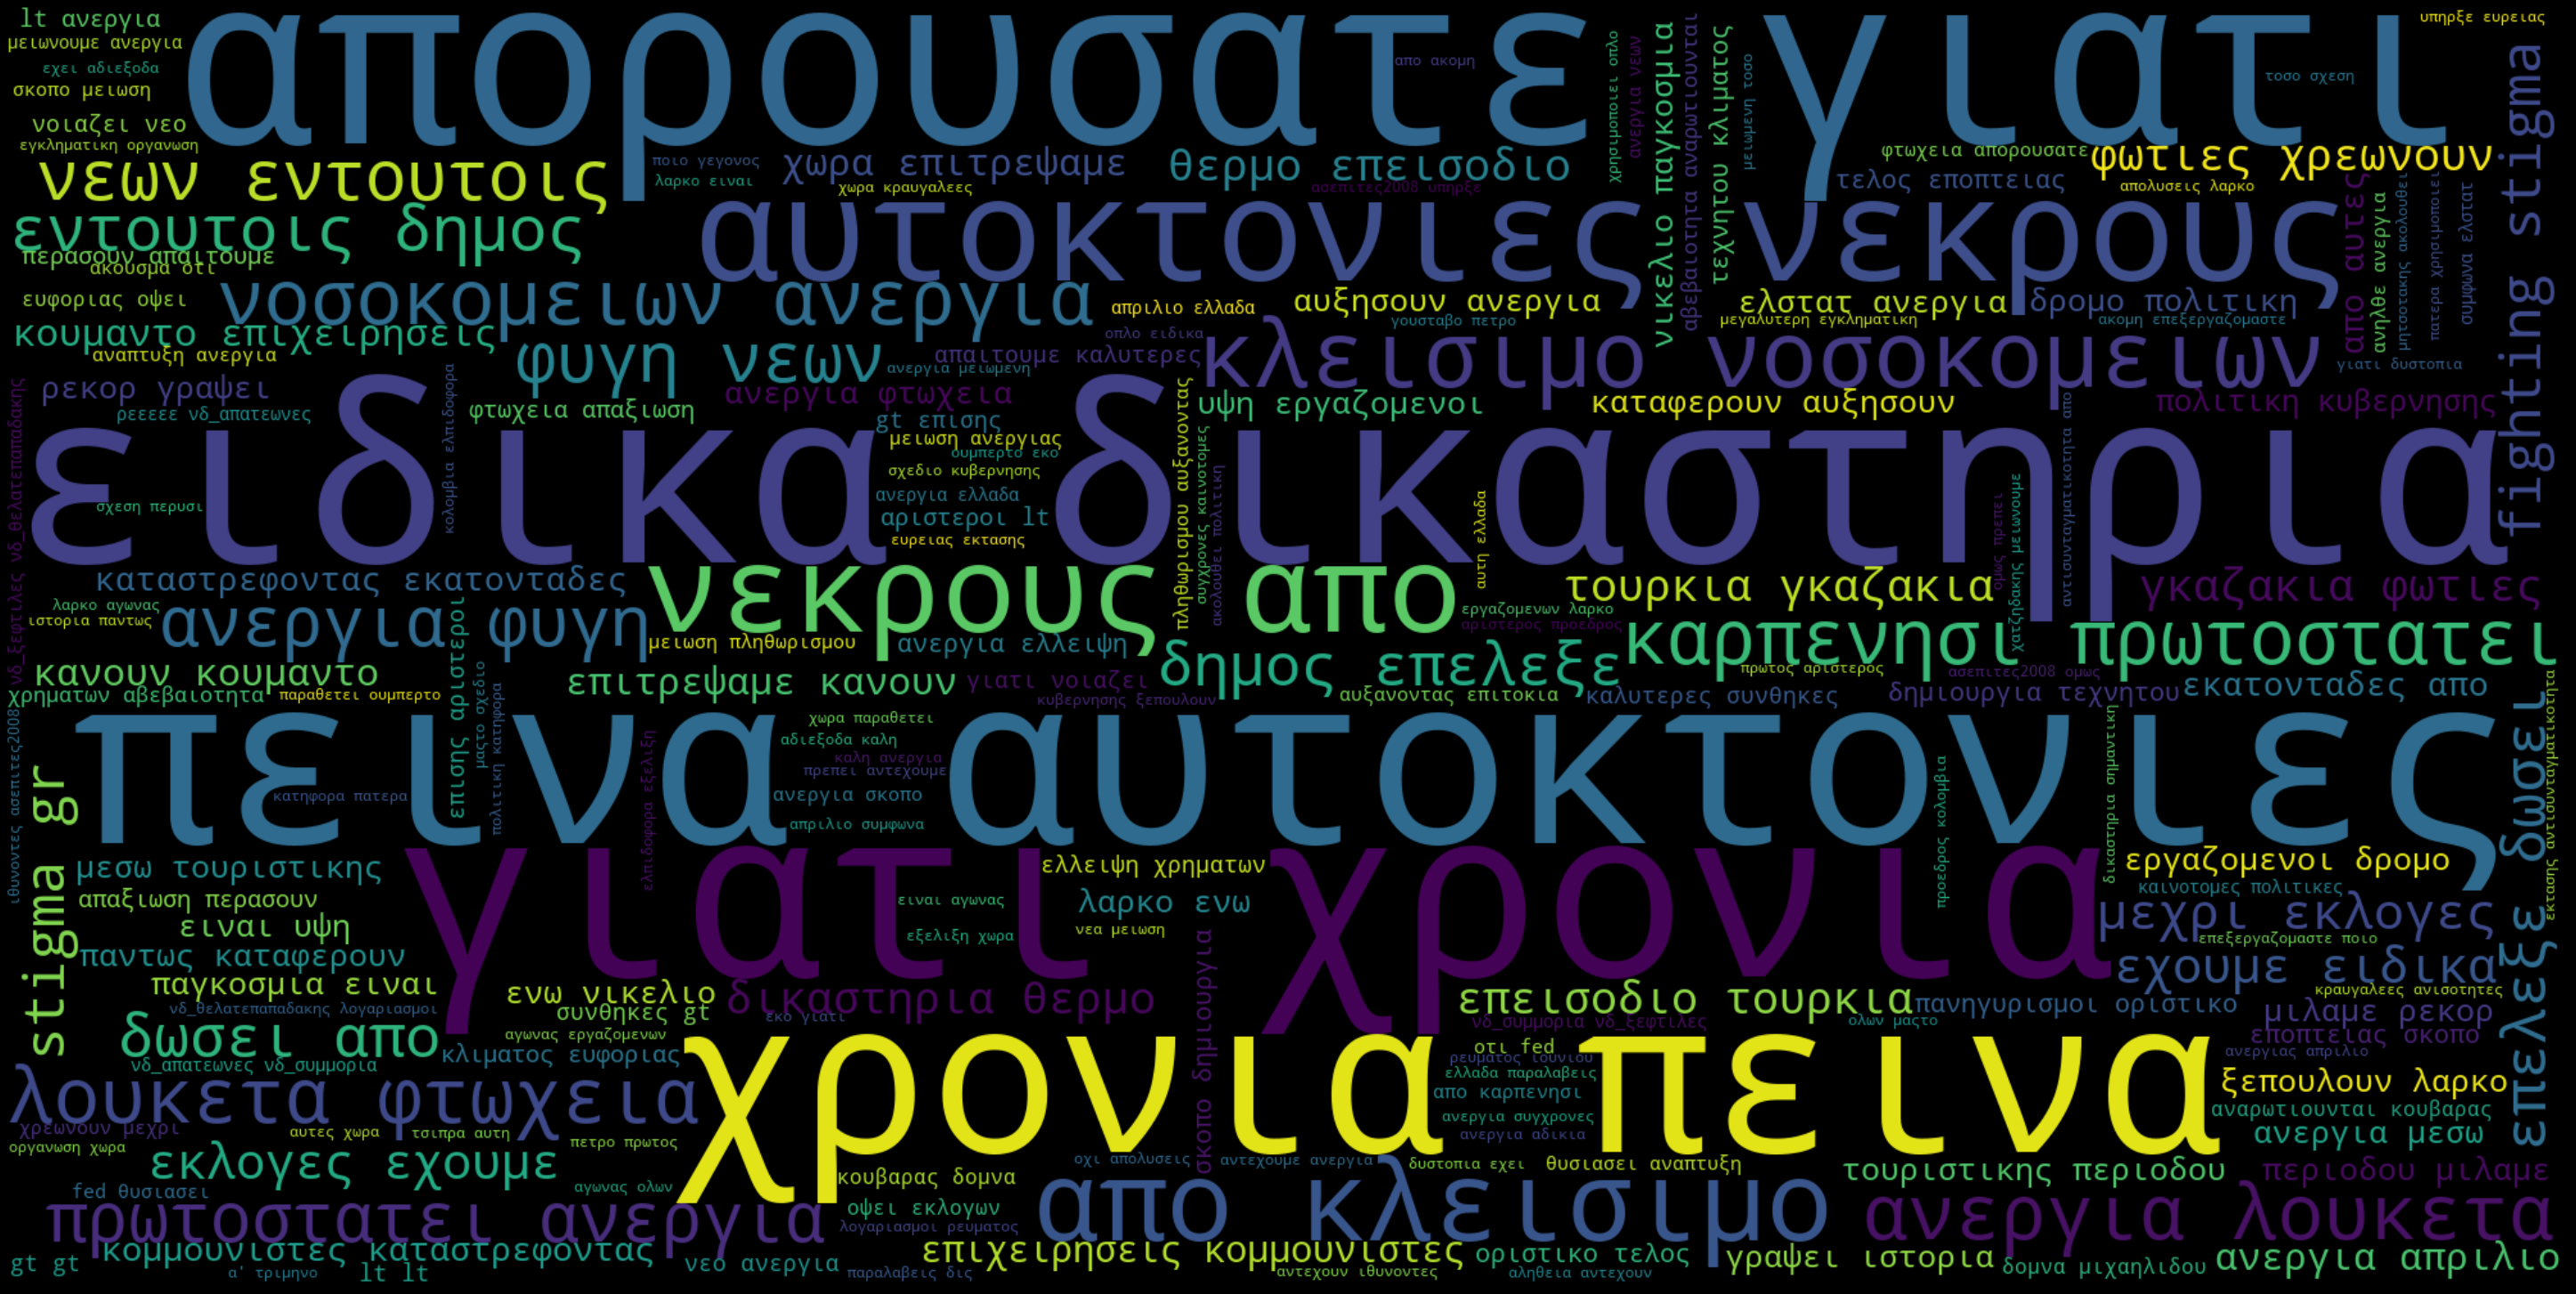

In [70]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Ζητούμενο 5. Πρέπει να βρούμε τις 16 πιο συχνές λέξεις που χρησιμοποιούνται στα κείμενα

In [71]:
#Ξεκινάμε το vectorization με βάση τα classworks (Κάνω αλλαγές όπου χρειάζεται)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [72]:
count_vector = cv.fit_transform(anergia_tweets['text'])

In [73]:
count_vector.shape

(2757, 2706)

In [74]:
# cv.get_feature_names()

results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


00  000  06  10  100  1000  10ετους  11  12  120  ...  ωρα  ωραιο  ωραιοι  \
0   0    0   0   0    0     0        0   0   0    0  ...    0      0       0   
1   0    0   0   0    0     0        0   0   0    0  ...    0      0       0   
2   0    0   0   0    0     0        0   0   1    0  ...    0      0       0   
3   0    0   0   0    0     0        0   0   0    0  ...    0      0       0   
4   0    0   0   0    0     0        0   0   0    0  ...    0      0       0   

   ωραιος  ωραρια  ωρες  ωρο  ως  ωστε  ωφεληματων  
0       0       0     0    0   0     0           0  
1       0       0     0    0   0     0           0  
2       0       0     0    0   0     0           0  
3       0       0     0    0   0     0           0  
4       0       0     0    0   0     0           0  

[5 rows x 2706 columns]

In [75]:
cv.vocabulary

In [76]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [77]:
count_vector = cv.fit_transform(anergia_tweets['text'])

In [78]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


000  100  12  120  13  2008  2015  2022  fed  fighting  ...  φυγη  φωτιες  \
0    0    0   0    0   0     0     0     0    0         1  ...     0       0   
1    0    0   0    0   0     0     0     0    0         1  ...     0       0   
2    0    0   1    0   0     0     0     0    0         1  ...     0       0   
3    0    0   0    0   0     0     0     0    0         0  ...     0       0   
4    0    0   0    0   0     0     0     0    0         0  ...     0       0   

   χατζηδακης  χρεωνουν  χρηματων  χρησιμοποιει  χρονια  χωρα  χωρις  ωρα  
0           0         0         0             0       0     0      0    0  
1           0         0         0             0       0     0      0    0  
2           0         0         0             0       0     0      0    0  
3           0         0         0             0       0     0      0    0  
4           0         0         0             0       0     0      0    0  

[5 rows x 224 columns]

In [79]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [80]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(anergia_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έκασε ο', 'έτερα', 'έτερων', 'ήσω', 'ίσιος', 'αλλιώ', 'αλλιώτικος', 'αλλοιώ', 'αρκετός', 'γίνομαι', 'γρήγορο', 'διο', 'είχος', 'εαυτής', 'εαυτός', 'εκάστος', 'επόμενος', 'εσένος', 'ετέραις', 'ετού', 'ετούε ο', 'εχτής', 'ιδίο', 'κάνενς', 'κάνω', 'κανενό', 'λοιπός', 'μέλλω', 'μερικός', 'μπορώ', 'μόνας', 'ολωσδιόλος', 'ορισμένος', 'οριόμενσς', 'ποία', 'πολύς', 'προτός', 'προχτής', 'σε ο', 'ταύ', 'τουλάχισε ο', 'τρίτος', 'τός', 'χωριστό'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


000  100  120  2008;καλουσαν  2015  2022  fed  fighting  lαt  stigma  ...  \
0    0    0    0              0     0     0    0         1    0       1  ...   
1    0    0    0              0     0     0    0         1    0       1  ...   
2    0    0    0              0     0     0    0         1    0       1  ...   
3    0    0    0              0     0     0    0         0    0       0  ...   
4    0    0    0              0     0     0    0         0    0       0  ...   

   φυγη  φωτιος  χατζηδακη  χρεωνω  χρηματων  χρησιμοποιει  χρονος  χωρα  \
0     0       0          0       0         0             0       0     0   
1     0       0          0       0         0             0       0     0   
2     0       0          0       0         0             0       0     0   
3     0       0          0       0         0             0       0     0   
4     0       0          0       0         0             0       0     0   

   χωρις  ωρα  
0      0    0  
1      0    0  
2      0    0  
3      0    0  
4      0    0  

[5 rows x 218 columns]

In [81]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(anergia_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


000  12  gt  ανεργια  απο  γιατι  δικαστηρια  ειδικα  ειναι  ελλαδα  \
0    0   0   0        0    0      0           0       0      0       0   
1    0   0   0        0    0      0           0       0      0       0   
2    0   1   0        1    0      0           0       0      0       0   
3    0   0   0        0    0      0           0       0      0       0   
4    0   0   0        0    0      0           0       0      0       0   

   εχουμε  κλεισιμο  λαρκο  μειωση  νεκρους  νεων  πεινα  φτωχεια  χρονια  \
0       0         0      0       0        0     0      0        0       0   
1       0         0      0       1        0     0      0        0       0   
2       0         0      0       0        0     0      0        0       0   
3       0         0      0       1        0     0      0        0       0   
4       0         0      0       1        0     0      0        0       0   

   χωρα  
0     0  
1     0  
2     0  
3     0  
4     0

In [82]:
#να δουμε τα 16 πιο συχνά σύμφωνα με την εκφώνηση
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head(16)  

ανεργια    1621
απο         627
12          349
γιατι       310
φτωχεια     296
000         271
λαρκο       261
ειναι       261
χρονια      251
εχουμε      245
νεων        224
gt          220
ελλαδα      208
χωρα        190
πεινα       183
ειδικα      175
dtype: int64

In [83]:
#για δυάδες λέξεων
cv2 = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector2 = cv2.fit_transform(anergia_tweets['text'])
results2 = pd.DataFrame(count_vector2.toarray(), columns=cv2.get_feature_names()) 
results2.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


12 χρονια  120 000  ανεργια λουκετα  απο κλεισιμο  απορουσατε γιατι  \
0          0        0                0             0                 0   
1          0        0                0             0                 0   
2          0        0                0             0                 0   
3          0        0                0             0                 0   
4          0        0                0             0                 0   

   αυτοκτονιες νεκρους  γιατι 12  δημος επελεξε  ειδικα δικαστηρια  \
0                    0         0              0                  0   
1                    0         0              0                  0   
2                    0         0              0                  0   
3                    0         0              0                  0   
4                    0         0              0                  0   

   εντουτοις δημος  επελεξε δωσει  καρπενησι πρωτοστατει  \
0                0              0                      0   
1                0              0                      0   
2                0              0                      0   
3                0              0                      0   
4                0              0                      0   

   κλεισιμο νοσοκομειων  λουκετα φτωχεια  νεκρους απο  νεων εντουτοις  \
0                     0                0            0               0   
1                     0                0            0               0   
2                     0                0            0               0   
3                     0                0            0               0   
4                     0                0            0               0   

   νοσοκομειων ανεργια  πεινα αυτοκτονιες  πρωτοστατει ανεργια  χρονια πεινα  
0                    0                  0                    0             0  
1                    0                  0                    0             0  
2                    0                  0                    0             0  
3                    0                  0                    0             0  
4                    0                  0                    0             0

In [84]:
#να δουμε τις 16 πιο συχνες δυαδες λεξεων
sum_words2 =  results2.sum(axis =0)
sum_words2.sort_values(ascending = False).head(16) 

ειδικα δικαστηρια       174
πεινα αυτοκτονιες       165
12 χρονια               164
νοσοκομειων ανεργια     164
νεκρους απο             164
κλεισιμο νοσοκομειων    164
χρονια πεινα            164
γιατι 12                164
αυτοκτονιες νεκρους     164
απορουσατε γιατι        164
απο κλεισιμο            164
ανεργια λουκετα         164
λουκετα φτωχεια         163
δημος επελεξε           162
εντουτοις δημος         162
120 000                 162
dtype: int64

**`Βλέπουμε με τον παραπάτω κώδικα, ποιες είναι οι πιο συχνές λέξεις, τόσο μόνες τους, όσο και σε ζευγάρια. `**



# Ζητούμενο 6. Ώρα να δημιουργήσουμε ένα γράφημα με στήλες (bar chart), στον x αξονα οι λέξεις και στον y οι συχνότητες.


Text(0.5, 1.0, '16 πιο συχνές λέξεις στα Tweets με #ανεργια')

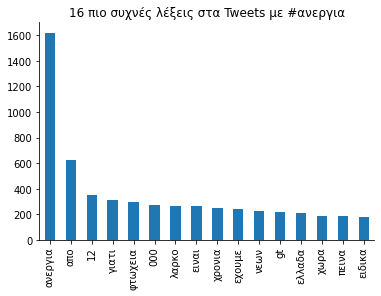

In [86]:
w = sum_words.sort_values(ascending = False).head(16).plot(kind='bar')
w.spines['right'].set_visible(False)
w.spines['top'].set_visible(False)
w.set_title('16 πιο συχνές λέξεις στα Tweets με #ανεργια')

Text(0.5, 1.0, '16 πιο συχνές δυάδες λέξεων στα Tweets #Ερντογαν')

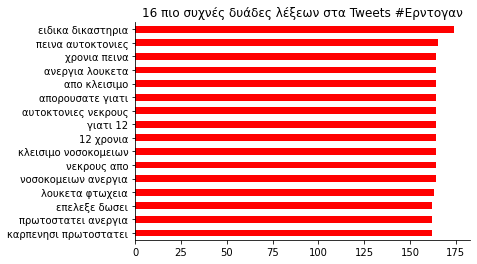

In [87]:
w2 = sum_words2.sort_values(ascending = True).tail(16).plot(kind='barh', color='red')
w2.spines['right'].set_visible(False)
w2.spines['top'].set_visible(False)
w2.set_title('16 πιο συχνές δυάδες λέξεων στα Tweets #Ερντογαν')

# Ζητούμενο 7. Πρέπει να δημιουργήσουμε συναισθηματική ανάλυση στα δεδομένα που έχουμε συλλέξει.

In [88]:
import glob
from sklearn.feature_extraction.text import CountVectorizer

In [89]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [90]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13166     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13167  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13168      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13169       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13170          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13166  0.0      0.0       1.0    0.0  
13167  0.0      0.0       0.0    0.0  
13168  0.0      0.0       0.0    0.0  
13169  0.0      0.0       0.0    0.0  
13170  0.0      0.0       0.0    0.0

In [91]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [92]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [93]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#CountVectorizer(stop_words='english', binary=True)
# Θέλω να ελέγξω μόνο τις λέξεις που υπάρχουν στο συναισθηματικό λεξικό

#CountVectorizer(analyzer = 'word', 
#                strip_accents = 'unicode', 
#                token_pattern='[Α-Ωα-ωΆ-Ώά-ώ]{2,}', 
#                stop_words= lc_stop_words_df['stop_w'].tolist())


matrix = vec.fit_transform(anergia_tweets['text'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:1323: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  "Upper case characters found in"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    0     0      0     0             0   
1      0                0        0    0     0      0     0             0   
2      0                0        0    0     0      0     0             0   
3      0                0        0    0     0      0     0             0   
4      0                0        0    0     0      0     0             0   

   αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
0     0       0  ...                 0               0      0        0   
1     0       0  ...                 0               0      0        0   
2     0       0  ...                 0               0      0        0   
3     0       0  ...                 0               0      0        0   
4     0       0  ...                 0               0      0        0   

   κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
0          0          0             0         0        0     0  
1          0          0             0         0        0     0  
2          0          0             0         0        0     0  
3          0          0             0         0        0     0  
4          0          0             0         0        0     0  

[5 rows x 13161 columns]

In [94]:
wordcount_df.shape

(2757, 13161)

In [95]:
emolex_df.head()

index             word  Positive  Negative  Anger  Anticipation  Disgust  \
0      0            αφεση       1.0       0.0    0.0           0.0      0.0   
1      1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   
2      2          εχοντας       0.0       0.0    0.0           0.0      0.0   
3      3              εχω       0.0       0.0    0.0           0.0      0.0   
4      4             οριο       0.0       0.0    0.0           0.0      0.0   

   Fear  Joy  Sadness  Surprise  Trust  
0   0.0  0.0      0.0       0.0    0.0  
1   0.0  0.0      0.0       0.0    0.0  
2   0.0  0.0      0.0       0.0    0.0  
3   0.0  0.0      0.0       0.0    0.0  
4   0.0  0.0      0.0       0.0    0.0

In [96]:
emolex_df[emolex_df.Anger == 1].tail()

index          word  Positive  Negative  Anger  Anticipation  Disgust  \
13094  13104      διεξοδος       0.0       0.0    1.0           0.0      0.0   
13096  13106        ζωυφια       0.0       1.0    1.0           0.0      1.0   
13100  13110    θυματοποιω       0.0       1.0    1.0           0.0      1.0   
13128  13138  αποτυχημενος       0.0       1.0    1.0           0.0      1.0   
13156  13166     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   

       Fear  Joy  Sadness  Surprise  Trust  
13094   0.0  0.0      0.0       0.0    0.0  
13096   1.0  0.0      0.0       0.0    0.0  
13100   1.0  0.0      1.0       1.0    0.0  
13128   0.0  0.0      0.0       0.0    0.0  
13156   1.0  0.0      0.0       1.0    0.0

In [97]:
#Ας φτιάξουμε τις λίστες μας

angry_words = emolex_df[emolex_df.Anger == 1]['word']
positive_words = emolex_df[emolex_df.Positive == 1]['word']
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']
negative_words = emolex_df[emolex_df.Negative == 1]['word']
joy_words = emolex_df[emolex_df.Joy == 1]['word']
trust_words = emolex_df[emolex_df.Trust == 1]['word']
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [98]:
anergia_tweets['anger'] = wordcount_df[angry_words].sum(axis=1)
anergia_tweets['positivity'] = wordcount_df[positive_words].sum(axis=1)
anergia_tweets['joy'] = wordcount_df[joy_words].sum(axis=1)
anergia_tweets['disgust'] = wordcount_df[disgust_words].sum(axis=1)
anergia_tweets['surprise'] = wordcount_df[surprise_words].sum(axis=1)
anergia_tweets['trust'] = wordcount_df[trust_words].sum(axis=1)
anergia_tweets['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)
anergia_tweets['sadness'] = wordcount_df[sadness_words].sum(axis=1)
anergia_tweets['negative'] = wordcount_df[negative_words].sum(axis=1)
anergia_tweets['fear'] = wordcount_df[fear_words].sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [99]:
anergia_tweets.head(2)

created_at  \
0 2022-06-21 12:43:35   
1 2022-06-21 12:43:34   

                                                                                                     text  \
0  fighting stigma gr σοκ προκαλεσε η πανδημια στην αγορα εργασιας της κρητης μεγαλη η ευαλωτοτητα της η    
1         fighting stigma gr μειωση των εγγεγραμμενων ανεργων τον μαιο δεν αναζητουν εργασια newmoney το    

   retweet_count  favorite_count  \
0              0               0   
1              0               0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            user  \
0  {'id': 208056970, 'id_str': '208056970', 'name': 'Stigmabase | UN', 'screen_name': 'StigmabaseU', 'location': 'WORLDWIDE', 'description': 'Asia — भारत  — Türkçe — Čeština — ελληνικά | Keeping up-to-date on global exclusion — Stigmabase is a canadian internet non-profit Initiative', 'url': 'https://t.co/DTaqNj9Hmn', 'entities': {'url': {'urls': [{'url': 'https://t.co/DTaqNj9Hmn', 'expanded_url': 'https://www.stigmabase.org/', 'display_url': 'stigmabase.org', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 2535, 'friends_count': 2403, 'listed_count': 117, 'created_at': 'Tue Oct 26 15:04:54 +0000 2010', 'favourites_count': 0, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 1609316, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': 'FFFFFF', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/378800000775227733/ae13c3d84fd6fa9876a0c7c46e3a3f24_normal.png', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/378800000775227733/ae13c3d84fd6fa9876a0c7c46e3a3f24_normal.png', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/208056970/1385144150', 'profile_link_color': '0084B4', 'profile_sidebar_border_color': 'FFFFFF', 'profile_sidebar_fill_color': 'DDEEF6', 'profile_text_color': '000000', 'profi

In [100]:
anergia_tweets['positivity'].sum() #Βαθμος θετικότητας στα συλλεγμένα tweets

1057

In [101]:
anergia_tweets['negative'].sum() #βαθμός αρνητικότητας στα συλλεγμένα tweets

1785

In [102]:
anergia_tweets.set_index('created_at' , inplace=True) #Βάζουμε ως index το date


# Ζητούμενο 8. Ας πραγματοποιήσουμε επιπλέον αναλύσεις και οπτικοποιήσεις στα δεδομένα μας.

**Ας κάνουμε για αρχλη μία ανάλυση και οπτικοποίηση σε γράφημα τα ποσοστά διαφόρων συναισθημάτων που εμφανίζονται στα παραπάνω tweets που συλλέξαμε.**

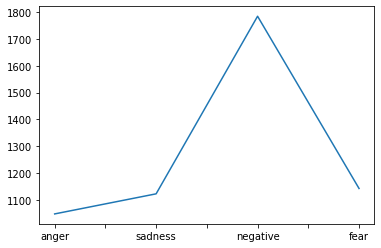

In [103]:
anergia_tweets[['anger','sadness','negative','fear']].sum().plot() #αρχικά για τα αρνητικά

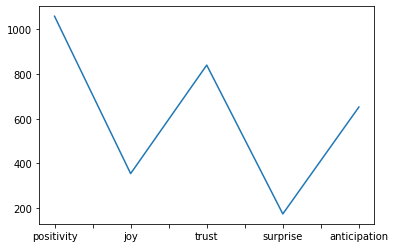

In [104]:
anergia_tweets[['positivity','joy','trust','surprise','anticipation']].sum().plot() #αρχικά για τα αρνητικά

Text(0.5, 0, 'Emotions')

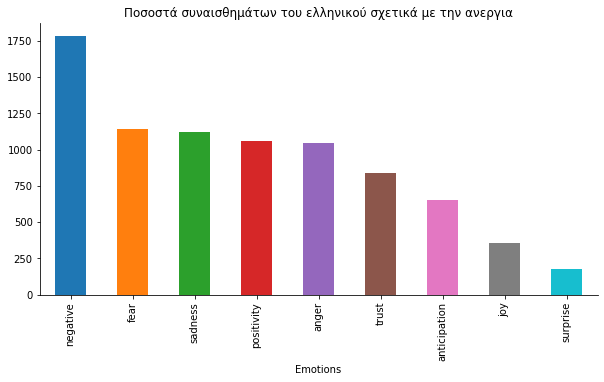

In [106]:
t = anergia_tweets[['anger','positivity','joy','surprise','trust','anticipation','sadness','negative','fear']].sum().sort_values(ascending= False).plot(kind='bar',color=('C0','C1','C2','C3','C4','C5','C6','C7','C9'), figsize=(10,5))
t.set_title('Ποσοστά συναισθημάτων του ελληνικού σχετικά με την ανεργια')
t.spines['right'].set_visible(False)
t.spines['top'].set_visible(False)
t.set_xlabel('Emotions')

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1200: UserWarning: Attempting to set identical left == right == 629.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1200: UserWarning: Attempting to set identical left == right == 629.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1200: UserWarning: Attempting to set identical left == right == 629.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1200: UserWarning: Attempting to set identical left == right == 629.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotl

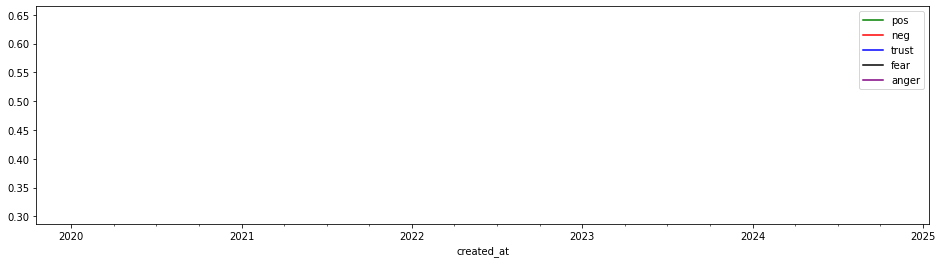

In [108]:
ax = anergia_tweets['positivity'].resample('M').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='pos')
anergia_tweets['negative'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg', color = 'r')
anergia_tweets['trust'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust',color = 'blue').legend()
anergia_tweets['fear'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'fear',color = 'black').legend()
anergia_tweets['anger'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'anger',color = 'purple').legend()